# Palo Alto Traffic Collisions Data Cleaning & Analysis

## The Problem

The City of Palo Alto's Office of Transportation wants to answer specific questions regarding collisions investigated by the Palo Alto Police Department during 2016 to 2021 and create an exploratory dashboard showcasing key metrics.

## Objectives

1. Find out the number of collisions for each day of the week.
2. Find out the number of collisions for different parts of the day.
3. Find the locations with the most collisions.
4. What is the relationship between the occurence of injuries and hit and runs?
5. Create an exploratory dashboard that includes the answers from Questions 1-3 and any additional relevant information in a visual format.

## The Datasets

This analysis uses the datasets compiled by the City of Palo titled "Traffic citations/written warnings issued by the Palo Alto Police Dept." The datasets are located here: https://data.cityofpaloalto.org/dashboards/8854/emergency-preparedness/

<a id="0"></a> <br>
### Table of Contents

1. [Importing and Concatenation](#1)
1. [Data Cleaning](#2)
    1. [Cleaning the Date and Hour Columns](#3)
    1. [Filling Null Values](#4)
1. [Question 1](#5)
    1. [Question 1 Answer](#6)
1. [Question 2](#7)
    1. [Question 2 Answer](#8)
1. [Question 3](#9)
    1. [Question 3 Answer](#10)
1. [Question 4](#11)
    1. [Question 4 Answer](#12)
1. [Question 5](#13)

<a id="1"></a>
## Data Importation and Concatenation

In [1]:
# Importing and appending multiple CSV files, removing the unnecessary Reported Date column, which the 2021 data is missing

import os
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None

path = 'D:\Palo Alto Traffic Collisions'
extension = '.csv'

files = [file for file in os.listdir(path) if file.endswith(extension)]

# Removing the Reported Date column because it is not present in all datasets
dfs = []
for file in files:
  df = pd.read_csv(os.path.join(path, file), usecols=lambda x: x != 'Reported Date')
  dfs.append(df)

In [2]:
# Checking that the columns names match between the data from each year
for i, df in enumerate(dfs):
    print(dfs[i].columns)

Index(['Occur Date', 'Occur Time', '#Inj', '#Killed', 'Hit/Run', 'Location',
       'At/Or', '#', 'Feet/ Miles', 'Cross Street'],
      dtype='object')
Index(['Occur Date', 'Occur Time', '# Inj', '# Killed', 'Hit/Run', 'Location',
       'At/Or', '#', 'Feet/ Miles', 'Cross Street'],
      dtype='object')
Index(['Occur Date', 'Occur Time', '# Inj', '# Killed', 'Hit/Run', 'Location',
       'At/Or', '#', 'Feet/ Miles', 'Cross Street'],
      dtype='object')
Index(['Occur Date', 'Occur Time', '# Inj', '# Killed', 'Hit/Run', 'Location',
       'At/Or', '#', 'Feet/ Miles', 'Cross Street'],
      dtype='object')
Index(['Occur Date', 'Occur Time', '# Inj', '# Killed', 'Hit/Run', 'Location',
       'At/Or', '#', 'Feet/ Miles', 'Cross Street'],
      dtype='object')
Index(['Occur Date', 'Occur Time', '# Injured', '# Killed', 'Hit/Run',
       'Location', 'At/Or', '#', 'Feet/ Miles', 'Cross Street'],
      dtype='object')


In [3]:
# Renaming the mismatched columns in preparation for a clean concatenation
for i, df in enumerate(dfs):
    dfs[i] = dfs[i].rename(columns={'#Inj': 'Injured',
                                    '# Inj': 'Injured',
                                    '# Injured': 'Injured',
                                    '#Killed': 'Killed',
                                    '# Killed':'Killed'
                                   }
                          )

In [4]:
# Making sure each dataframe has the same number of columns
for i, df in enumerate(dfs):
    print(dfs[i].shape)

(961, 10)
(952, 10)
(993, 10)
(830, 10)
(446, 10)
(515, 10)


In [5]:
# Checking that each dataframe has the same column names before concatenation
for i, df in enumerate(dfs):
    print(dfs[i].columns)

Index(['Occur Date', 'Occur Time', 'Injured', 'Killed', 'Hit/Run', 'Location',
       'At/Or', '#', 'Feet/ Miles', 'Cross Street'],
      dtype='object')
Index(['Occur Date', 'Occur Time', 'Injured', 'Killed', 'Hit/Run', 'Location',
       'At/Or', '#', 'Feet/ Miles', 'Cross Street'],
      dtype='object')
Index(['Occur Date', 'Occur Time', 'Injured', 'Killed', 'Hit/Run', 'Location',
       'At/Or', '#', 'Feet/ Miles', 'Cross Street'],
      dtype='object')
Index(['Occur Date', 'Occur Time', 'Injured', 'Killed', 'Hit/Run', 'Location',
       'At/Or', '#', 'Feet/ Miles', 'Cross Street'],
      dtype='object')
Index(['Occur Date', 'Occur Time', 'Injured', 'Killed', 'Hit/Run', 'Location',
       'At/Or', '#', 'Feet/ Miles', 'Cross Street'],
      dtype='object')
Index(['Occur Date', 'Occur Time', 'Injured', 'Killed', 'Hit/Run', 'Location',
       'At/Or', '#', 'Feet/ Miles', 'Cross Street'],
      dtype='object')


In [6]:
# Creating the combined dataframe
df = pd.concat(dfs, ignore_index=True)
df.tail()

,Occur Date,Occur Time,Injured,Killed,Hit/Run,Location,At/Or,#,Feet/ Miles,Cross Street
4692,12/10/21,817.0,NaN,NaN,N,LOWELL AVE,AT,NaN,NaN,WAVERLEY ST
4693,12/5/21,1130.0,NaN,NaN,N,EMBARCADERO RD,AT,NaN,NaN,HIGH
4694,12/2/21,1635.0,NaN,NaN,N,200BLK HAMILTON AV,NaN,NaN,NaN,NaN
4695,12/7/21,1200.0,NaN,NaN,N,2100BLK W BAYSHORE RD,NaN,NaN,NaN,NaN
4696,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# checking the combined dataframe's shape and columns
print(df.shape, df.columns)

(4697, 10) Index(['Occur Date', 'Occur Time', 'Injured', 'Killed', 'Hit/Run', 'Location',
       'At/Or', '#', 'Feet/ Miles', 'Cross Street'],
      dtype='object')


<a id="2"></a>
## Data Cleaning

[back to Table of Contents](#0)

In [8]:
# Dropping unnecessary columns
df = df.drop(columns=['At/Or','#','Feet/ Miles'])
df.head()

,Occur Date,Occur Time,Injured,Killed,Hit/Run,Location,Cross Street
0,01/01/2016,13:13,NaN,NaN,N,2100BLK FRANCIS DR,EMBARCADERO ST
1,01/01/2016,12:00,NaN,NaN,Y,900BLK HAMILTON AV,SENECA CT
2,01/02/2016,13:29,3.0,NaN,N,UNIVERSITY AV,HIGH ST
3,01/03/2016,15:07,NaN,NaN,N,4200BLK SUZANNE DR,KELLY
4,01/04/2016,8:11,1.0,NaN,N,300BLK MIDDLEFIELD RD,EVERETT AVE


In [9]:
# Checking for any irregular values in each column
for i in df.columns:
    print(df[i].value_counts())

05/29/2018    10
07/26/2016     9
06/05/2017     9
07/22/2016     9
06/29/2016     9
              ..
07/06/2019     1
07/09/2019     1
07/13/2019     1
07/14/2019     1
1              1
Name: Occur Date, Length: 1829, dtype: int64
0:00      51
15:30     38
16:00     33
15:00     31
14:00     31
          ..
16:52      1
7:22       1
745        1
13:43      1
1620.0     1
Name: Occur Time, Length: 1452, dtype: int64
1.0    1486
2.0     325
3.0      68
4.0      13
0.0      11
5.0       4
6.0       3
9.0       1
Name: Injured, dtype: int64
1.0    9
0.0    6
Name: Killed, dtype: int64
N    3603
Y    1030
Name: Hit/Run, dtype: int64
EL CAMINO REAL           173
100BLK EL CAMINO REAL    148
MIDDLEFIELD  RD           88
ALMA ST                   74
MIDDLEFIELD RD            73
                        ... 
FULTON ST                  1
LOWELL AV                  1
METRO CI                   1
MORENO AV                  1
LOWELL AVE                 1
Name: Location, Length: 1154, dtype: int64
E

Occur Date and Occur Time appear to have some strange values

<a id="3"></a>
## Cleaning the Date and Hour Columns

In [10]:
# Checking rows to determine which values are not in data format
df['Occur Date'].str.contains('/').value_counts()

True     4696
False       1
Name: Occur Date, dtype: int64

In [11]:
# locating the row not in date format
df[~df['Occur Date'].str.contains('/')]

,Occur Date,Occur Time,Injured,Killed,Hit/Run,Location,Cross Street
4696,1,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Checking to make sure that no string value lengths are above 4 characters before reinserting colons
df['Occur Date'].str.len().value_counts()
df.tail()

,Occur Date,Occur Time,Injured,Killed,Hit/Run,Location,Cross Street
4692,12/10/21,817.0,NaN,NaN,N,LOWELL AVE,WAVERLEY ST
4693,12/5/21,1130.0,NaN,NaN,N,EMBARCADERO RD,HIGH
4694,12/2/21,1635.0,NaN,NaN,N,200BLK HAMILTON AV,NaN
4695,12/7/21,1200.0,NaN,NaN,N,2100BLK W BAYSHORE RD,NaN
4696,1,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Removing the row with all null values
df = df.drop([4696])

In [14]:
# Converting Occur Time to string in order to check for the number of values that are not in the hour:min format
df['Occur Time'].astype(str)
df['Occur Time'].str.contains(':', regex=False, na=False).value_counts()

True     4180
False     516
Name: Occur Time, dtype: int64

In [15]:
# locating the rows not in date format
df[~df['Occur Time'].str.contains(':', regex=False, na=False)]

,Occur Date,Occur Time,Injured,Killed,Hit/Run,Location,Cross Street
1922,01/04/2018,16;00,NaN,NaN,N,400BLK W CHARLESTON RD,WILKIE WAY
3136,04/22/2019,745,1.0,NaN,N,1100BLK CALIFORNIA AVE,HARVARD ST
4182,01/03/2021,1440.0,1.0,NaN,N,CAMPUS DR,QUARRY RD
4183,01/04/2021,910.0,NaN,NaN,N,2400BLK W BAYSHORE RD,CHABOT TERRACE
4184,01/04/2021,1230.0,1.0,NaN,N,3800BLK EL CAMINO REAL,VENTURE AV
...,...,...,...,...,...,...,...
4691,12/11/21,1620.0,NaN,NaN,N,ELY PL,LUNDY LN
4692,12/10/21,817.0,NaN,NaN,N,LOWELL AVE,WAVERLEY ST
4693,12/5/21,1130.0,NaN,NaN,N,EMBARCADERO RD,HIGH
4694,12/2/21,1635.0,NaN,NaN,N,200BLK HAMILTON AV,NaN


In [16]:
# Converting time to an object 
df['Occur Time'].astype(object)

0        13:13
1        12:00
2        13:29
3        15:07
4         8:11
         ...  
4691    1620.0
4692     817.0
4693    1130.0
4694    1635.0
4695    1200.0
Name: Occur Time, Length: 4696, dtype: object

In [17]:
df.head()

,Occur Date,Occur Time,Injured,Killed,Hit/Run,Location,Cross Street
0,01/01/2016,13:13,NaN,NaN,N,2100BLK FRANCIS DR,EMBARCADERO ST
1,01/01/2016,12:00,NaN,NaN,Y,900BLK HAMILTON AV,SENECA CT
2,01/02/2016,13:29,3.0,NaN,N,UNIVERSITY AV,HIGH ST
3,01/03/2016,15:07,NaN,NaN,N,4200BLK SUZANNE DR,KELLY
4,01/04/2016,8:11,1.0,NaN,N,300BLK MIDDLEFIELD RD,EVERETT AVE


In [18]:
# Converting time to a string and then removing the decimal points and zeros
df['Occur Time'] = df['Occur Time'].astype(str).replace('\.0','',regex=True)
df

,Occur Date,Occur Time,Injured,Killed,Hit/Run,Location,Cross Street
0,01/01/2016,13:13,NaN,NaN,N,2100BLK FRANCIS DR,EMBARCADERO ST
1,01/01/2016,12:00,NaN,NaN,Y,900BLK HAMILTON AV,SENECA CT
2,01/02/2016,13:29,3.0,NaN,N,UNIVERSITY AV,HIGH ST
3,01/03/2016,15:07,NaN,NaN,N,4200BLK SUZANNE DR,KELLY
4,01/04/2016,8:11,1.0,NaN,N,300BLK MIDDLEFIELD RD,EVERETT AVE
...,...,...,...,...,...,...,...
4691,12/11/21,1620,NaN,NaN,N,ELY PL,LUNDY LN
4692,12/10/21,817,NaN,NaN,N,LOWELL AVE,WAVERLEY ST
4693,12/5/21,1130,NaN,NaN,N,EMBARCADERO RD,HIGH
4694,12/2/21,1635,NaN,NaN,N,200BLK HAMILTON AV,NaN


In [19]:
# Removing the colon symbols 
df['Occur Time'] = df['Occur Time'].str.replace(r'\W', '', regex=True)
df.tail()

,Occur Date,Occur Time,Injured,Killed,Hit/Run,Location,Cross Street
4691,12/11/21,1620,NaN,NaN,N,ELY PL,LUNDY LN
4692,12/10/21,817,NaN,NaN,N,LOWELL AVE,WAVERLEY ST
4693,12/5/21,1130,NaN,NaN,N,EMBARCADERO RD,HIGH
4694,12/2/21,1635,NaN,NaN,N,200BLK HAMILTON AV,NaN
4695,12/7/21,1200,NaN,NaN,N,2100BLK W BAYSHORE RD,NaN


In [20]:
df

,Occur Date,Occur Time,Injured,Killed,Hit/Run,Location,Cross Street
0,01/01/2016,1313,NaN,NaN,N,2100BLK FRANCIS DR,EMBARCADERO ST
1,01/01/2016,1200,NaN,NaN,Y,900BLK HAMILTON AV,SENECA CT
2,01/02/2016,1329,3.0,NaN,N,UNIVERSITY AV,HIGH ST
3,01/03/2016,1507,NaN,NaN,N,4200BLK SUZANNE DR,KELLY
4,01/04/2016,811,1.0,NaN,N,300BLK MIDDLEFIELD RD,EVERETT AVE
...,...,...,...,...,...,...,...
4691,12/11/21,1620,NaN,NaN,N,ELY PL,LUNDY LN
4692,12/10/21,817,NaN,NaN,N,LOWELL AVE,WAVERLEY ST
4693,12/5/21,1130,NaN,NaN,N,EMBARCADERO RD,HIGH
4694,12/2/21,1635,NaN,NaN,N,200BLK HAMILTON AV,NaN


In [21]:
# checking for short time values
df['Occur Time'].str.len().value_counts()

4    3592
3    1098
1       5
2       1
Name: Occur Time, dtype: int64

In [22]:
# select the rows with short, unintelligble times in preparation for dropping
short_times = df[df['Occur Time'].str.len().isin([1, 2])].index
short_times

Int64Index([4231, 4297, 4328, 4386, 4429, 4663], dtype='int64')

In [23]:
# Removing the short time rows
df.drop(short_times, inplace=True)
df.tail(10)

,Occur Date,Occur Time,Injured,Killed,Hit/Run,Location,Cross Street
4686,12/17/21,1410,NaN,NaN,N,WAVERLEY ST,OREGON AVE
4687,12/24/21,2015,NaN,NaN,N,OREGON AV,ALMA ST
4688,12/21/21,955,NaN,NaN,N,OREGON EX,MIDDLEFIELD RD
4689,12/16/21,2005,NaN,NaN,N,UNIVERSITY AV,HIGH ST
4690,12/14/21,855,NaN,NaN,N,ARASTRADERO RD,KING ARTHURS CT
4691,12/11/21,1620,NaN,NaN,N,ELY PL,LUNDY LN
4692,12/10/21,817,NaN,NaN,N,LOWELL AVE,WAVERLEY ST
4693,12/5/21,1130,NaN,NaN,N,EMBARCADERO RD,HIGH
4694,12/2/21,1635,NaN,NaN,N,200BLK HAMILTON AV,NaN
4695,12/7/21,1200,NaN,NaN,N,2100BLK W BAYSHORE RD,NaN


In [24]:
# Checking the string length of times, should only be 3 or 4
df['Occur Time'].str.len().value_counts()

4    3592
3    1098
Name: Occur Time, dtype: int64

In [25]:
# Removing the minutes from the time values
df['Occur Time'] = df['Occur Time'].str[:-2]
df

,Occur Date,Occur Time,Injured,Killed,Hit/Run,Location,Cross Street
0,01/01/2016,13,NaN,NaN,N,2100BLK FRANCIS DR,EMBARCADERO ST
1,01/01/2016,12,NaN,NaN,Y,900BLK HAMILTON AV,SENECA CT
2,01/02/2016,13,3.0,NaN,N,UNIVERSITY AV,HIGH ST
3,01/03/2016,15,NaN,NaN,N,4200BLK SUZANNE DR,KELLY
4,01/04/2016,8,1.0,NaN,N,300BLK MIDDLEFIELD RD,EVERETT AVE
...,...,...,...,...,...,...,...
4691,12/11/21,16,NaN,NaN,N,ELY PL,LUNDY LN
4692,12/10/21,8,NaN,NaN,N,LOWELL AVE,WAVERLEY ST
4693,12/5/21,11,NaN,NaN,N,EMBARCADERO RD,HIGH
4694,12/2/21,16,NaN,NaN,N,200BLK HAMILTON AV,NaN


In [26]:
# Checking that hour values range from 0 to 23
df['Occur Time'].unique()

array(['13', '12', '15', '8', '9', '14', '17', '0', '16', '10', '20', '1',
       '6', '21', '3', '18', '19', '11', '7', '22', '5', '2', '23', '4'],
      dtype=object)

In [27]:
# Checking Datatypes
df.dtypes

Occur Date       object
Occur Time       object
Injured         float64
Killed          float64
Hit/Run          object
Location         object
Cross Street     object
dtype: object

In [28]:
# Checking number of rows in the date column by their string length
df['Occur Date'].str.len().value_counts()

10    4676
8        9
7        5
Name: Occur Date, dtype: int64

In [29]:
# Identifying the rows that do not have a string length of 10
short_dates = df[df['Occur Date'].str.len().isin([8, 7])].index
short_dates

Int64Index([4682, 4683, 4684, 4685, 4686, 4687, 4688, 4689, 4690, 4691, 4692,
            4693, 4694, 4695],
           dtype='int64')

In [30]:
# Dropping rows that do not have have a string length of 10
df.drop(short_dates, inplace=True)
df.tail(10)

,Occur Date,Occur Time,Injured,Killed,Hit/Run,Location,Cross Street
4672,12/22/2021,6,1.0,NaN,N,FOOTHILL EX,ARASTRADERO RD
4673,12/22/2021,18,0.0,NaN,Y,400BLK HAMILTON AVE,COWPER ST
4674,12/22/2021,9,NaN,NaN,N,E BAYSHORE RD,EMBARCADERO RD
4675,12/23/2021,18,2.0,NaN,N,400BLK OF OREGON AV,WAVERLEY ST
4676,12/23/2021,18,2.0,NaN,N,MIDDLEFIELD RD,LOMA VERDE AV
4677,12/23/2021,12,NaN,NaN,N,ALMA ST,KINGSLEY AV
4678,12/24/2021,13,1.0,NaN,Y,UNIVERSITY AV,CHAUCER ST
4679,12/25/2021,2,NaN,NaN,Y,1900BLK EDGEWOOD DR,GREER RD
4680,12/28/2021,1,NaN,NaN,Y,3600BLK MIDDLEFIELD RD,MAYVIEW AV
4681,12/28/2021,11,NaN,NaN,N,ALMA ST,OREGON EX


In [31]:
df.dtypes

Occur Date       object
Occur Time       object
Injured         float64
Killed          float64
Hit/Run          object
Location         object
Cross Street     object
dtype: object

<a id="4"></a>
## Filling Null Values

In [32]:
# Checking null values
df.isnull().sum()

Occur Date         0
Occur Time         0
Injured         2765
Killed          4661
Hit/Run           63
Location           0
Cross Street     521
dtype: int64

In [33]:
# Filling null values in the Injured and Kill Columns with 0
df['Injured'] = df['Injured'].fillna(0)
df['Killed'] = df['Killed'].fillna(0)
df.head(10)

,Occur Date,Occur Time,Injured,Killed,Hit/Run,Location,Cross Street
0,01/01/2016,13,0.0,0.0,N,2100BLK FRANCIS DR,EMBARCADERO ST
1,01/01/2016,12,0.0,0.0,Y,900BLK HAMILTON AV,SENECA CT
2,01/02/2016,13,3.0,0.0,N,UNIVERSITY AV,HIGH ST
3,01/03/2016,15,0.0,0.0,N,4200BLK SUZANNE DR,KELLY
4,01/04/2016,8,1.0,0.0,N,300BLK MIDDLEFIELD RD,EVERETT AVE
5,01/04/2016,9,0.0,0.0,Y,700BLK EL CAMINO REAL,NaN
6,01/04/2016,9,1.0,0.0,N,PAGE MILL RD,PAGE MILL RD
7,01/04/2016,14,0.0,0.0,N,UNIVERSITY AV,EL CAMINO REAL
8,01/05/2016,9,1.0,0.0,N,3800BLK MIRANDA AV,HILLVIEW AVE
9,01/05/2016,12,0.0,0.0,Y,SAN ANTONIO RD,E BAYSHORE RD


In [34]:
# Converting Occur Date to datetime format
df['Occur Date'] = pd.to_datetime(df['Occur Date'])

In [35]:
# Creating a new day of the weeek column dervied from the DateTime column
df['Day of the Week'] = df['Occur Date'].dt.day_of_week

In [36]:
df

,Occur Date,Occur Time,Injured,Killed,Hit/Run,Location,Cross Street,Day of the Week
0,2016-01-01,13,0.0,0.0,N,2100BLK FRANCIS DR,EMBARCADERO ST,4
1,2016-01-01,12,0.0,0.0,Y,900BLK HAMILTON AV,SENECA CT,4
2,2016-01-02,13,3.0,0.0,N,UNIVERSITY AV,HIGH ST,5
3,2016-01-03,15,0.0,0.0,N,4200BLK SUZANNE DR,KELLY,6
4,2016-01-04,8,1.0,0.0,N,300BLK MIDDLEFIELD RD,EVERETT AVE,0
...,...,...,...,...,...,...,...,...
4677,2021-12-23,12,0.0,0.0,N,ALMA ST,KINGSLEY AV,3
4678,2021-12-24,13,1.0,0.0,Y,UNIVERSITY AV,CHAUCER ST,4
4679,2021-12-25,2,0.0,0.0,Y,1900BLK EDGEWOOD DR,GREER RD,5
4680,2021-12-28,1,0.0,0.0,Y,3600BLK MIDDLEFIELD RD,MAYVIEW AV,1


In [37]:
# Creating an index column for later aggregation purposes
df['Collision_ID'] = df.index
df.head()

,Occur Date,Occur Time,Injured,Killed,Hit/Run,Location,Cross Street,Day of the Week,Collision_ID
0,2016-01-01,13,0.0,0.0,N,2100BLK FRANCIS DR,EMBARCADERO ST,4,0
1,2016-01-01,12,0.0,0.0,Y,900BLK HAMILTON AV,SENECA CT,4,1
2,2016-01-02,13,3.0,0.0,N,UNIVERSITY AV,HIGH ST,5,2
3,2016-01-03,15,0.0,0.0,N,4200BLK SUZANNE DR,KELLY,6,3
4,2016-01-04,8,1.0,0.0,N,300BLK MIDDLEFIELD RD,EVERETT AVE,0,4


<a id="5"></a>
## Q1. Find out the distribution of collisions and hit and runs for each day of the week

In [38]:
# Checking that there are a maximum of 7 days
df['Day of the Week'].value_counts()

3    798
1    771
4    764
2    741
0    732
5    501
6    369
Name: Day of the Week, dtype: int64

In [39]:
# Replacing the day keys with category values
day_dict = {0: 'Monday',
           1: 'Tuesday',
           2: 'Wednesday',
           3: 'Thursday',
           4: 'Friday',
           5: 'Saturday',
           6: 'Sunday'}

df.replace({'Day of the Week':day_dict}, inplace=True)

<a id="6"></a>
## Q1 Answer:

[back to Table of Contents](#0)

In [40]:
# Grouping by Day of the Week
agg_day_of_week = df.filter(items=['Day of the Week','Collision_ID']).groupby(by=['Day of the Week']).count().sort_values(by=['Collision_ID'], ascending=False)
agg_day_of_week

,Collision_ID
Day of the Week,
Thursday,798
Tuesday,771
Friday,764
Wednesday,741
Monday,732
Saturday,501
Sunday,369


<Axes: xlabel='Day of the Week'>

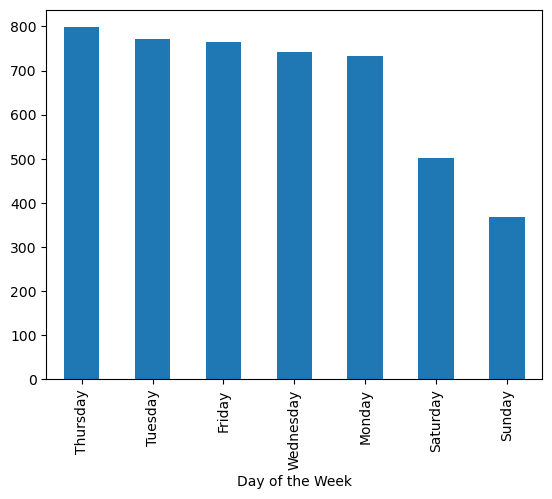

In [41]:
# Plotting number of collisions by day of the week
agg_day_of_week.plot.bar(legend=False)

<a id="7"></a>
## Q2. Find out the distribution of collisions for different parts of the day.

In [42]:
# Converting Occur Hour to an Int64 (accomodating null values), to allow the following function to work
df['Occur Time'] = df['Occur Time'].astype('Int64')

In [43]:
# Filling the Hour column with a temp int value to allow the following function to work
df['Occur Time'] = df['Occur Time'].fillna(100)

In [44]:
# Creating a function to separate hours of the day into separate daytime categories
def daytime_cat(x):
        if (x >= 8) & (x < 12):
            return 'Morning'
        elif (x >= 12) & (x < 16):
            return "Midday/Afternoon"
        elif (x >= 16) & (x < 20):
            return 'Late Afternoon/Evening'
        elif (x >= 20) & (x < 24):
            return 'Night'
        elif (x >= 0) & (x < 4):
            return "Late Night"
        elif (x >= 4) & (x < 8):
            return 'Dawn/Early Morning'
    

In [45]:
# Creating a new column using the above function
df['Time of Day'] = df['Occur Time'].apply(daytime_cat)


In [46]:
# Checking that the new daytime categories converted correctly, along with the null values
print(df.head(), df.tail())
print(df['Time of Day'].unique())

  Occur Date  Occur Time  Injured  Killed Hit/Run               Location  \
0 2016-01-01          13      0.0     0.0       N     2100BLK FRANCIS DR   
1 2016-01-01          12      0.0     0.0       Y     900BLK HAMILTON AV   
2 2016-01-02          13      3.0     0.0       N          UNIVERSITY AV   
3 2016-01-03          15      0.0     0.0       N     4200BLK SUZANNE DR   
4 2016-01-04           8      1.0     0.0       N  300BLK MIDDLEFIELD RD   

     Cross Street Day of the Week  Collision_ID       Time of Day  
0  EMBARCADERO ST          Friday             0  Midday/Afternoon  
1       SENECA CT          Friday             1  Midday/Afternoon  
2         HIGH ST        Saturday             2  Midday/Afternoon  
3           KELLY          Sunday             3  Midday/Afternoon  
4     EVERETT AVE          Monday             4           Morning        Occur Date  Occur Time  Injured  Killed Hit/Run                Location  \
4677 2021-12-23          12      0.0     0.0       N   

In [47]:
# Checking the number of null values
df.isnull().sum()

Occur Date           0
Occur Time           0
Injured              0
Killed               0
Hit/Run             63
Location             0
Cross Street       521
Day of the Week      0
Collision_ID         0
Time of Day          0
dtype: int64

<a id="8"></a>
## Q2 Answer:

[back to Table of Contents](#0)

In [48]:
# Grouping by Time of Day
agg_time_of_day = df.filter(items=['Time of Day','Collision_ID']).groupby(by=['Time of Day']).count().sort_values(by=['Collision_ID'], ascending=False)
agg_time_of_day

,Collision_ID
Time of Day,
Midday/Afternoon,1399
Late Afternoon/Evening,1209
Morning,1193
Night,382
Dawn/Early Morning,298
Late Night,195


<Axes: xlabel='Time of Day'>

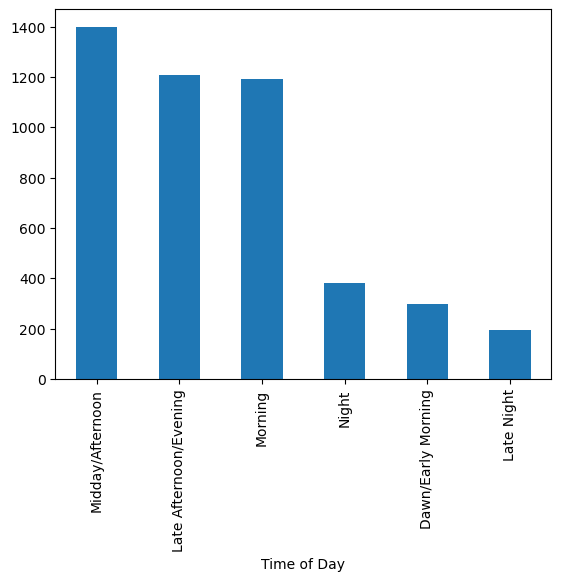

In [49]:
# Plotting the number of collisions by time of day
agg_time_of_day.plot.bar(legend=False)

<a id="9"></a>
## Q3. Find the locations with the most collisions.

In [50]:
# Checking the number of collisions by location and cross street
print(df['Location'].value_counts(), df['Cross Street'].value_counts())

EL CAMINO REAL           173
100BLK EL CAMINO REAL    147
MIDDLEFIELD  RD           88
ALMA ST                   74
MIDDLEFIELD RD            73
                        ... 
FLORENCE ST                1
FULTON ST                  1
LOWELL AV                  1
METRO CI                   1
1900BLK EDGEWOOD DR        1
Name: Location, Length: 1150, dtype: int64 EL CAMINO REAL           147
MIDDLEFIELD RD           139
EMBARCADERO RD            94
ALMA ST                   78
COWPER ST                 74
                        ... 
MITCHELL PARK LIBRARY      1
CORINA WAY                 1
CURNER AVE                 1
LA PARA AVE                1
PALM AV                    1
Name: Cross Street, Length: 1002, dtype: int64


In [51]:
# Grouping by just Location
df.filter(items=['Location','Cross Street','Collision_ID']).groupby(by=['Location']).count().sort_values(by=['Collision_ID'], ascending=False).head(10)

,Cross Street,Collision_ID
Location,,
EL CAMINO REAL,171,173
100BLK EL CAMINO REAL,77,147
MIDDLEFIELD RD,87,88
ALMA ST,74,74
MIDDLEFIELD RD,72,73
OREGON EX,70,70
EMBARCADERO RD,65,66
UNIVERSITY AV,65,65
EMBARCADERO RD,62,63


In [52]:
# Grouping by Location and Cross Street
df.filter(items=['Location','Cross Street','Collision_ID']).groupby(by=['Location','Cross Street']).count().sort_values(by=['Collision_ID'], ascending=False).head(10)

Collision_ID
Location              Cross Street                 
SAN ANTONIO RD        E CHARLESTON RD            17
100BLK EL CAMINO REAL QUARRY RD                  17
800BLK SAN ANTONIO RD E CHARLESTON RD            13
100BLK EL CAMINO REAL SAND HILL RD               13
OREGON EX             ALMA ST                    13
                      MIDDLEFIELD RD             11
EMBARCADERO RD        GREER RD                   10
EL CAMINO REAL        QUARRY RD                  10
                      EMBARCADERO RD             10
100BLK EL CAMINO REAL SANDHILL RD                10

In [53]:
# Checking one of the locations with top number of collisions
df[
    (df['Location'] == 'SAN ANTONIO RD') &
    (df['Cross Street'] == 'E CHARLESTON RD')
]

,Occur Date,Occur Time,Injured,Killed,Hit/Run,Location,Cross Street,Day of the Week,Collision_ID,Time of Day
529,2016-07-20,9,0.0,0.0,N,SAN ANTONIO RD,E CHARLESTON RD,Wednesday,529,Morning
799,2016-10-17,15,0.0,0.0,N,SAN ANTONIO RD,E CHARLESTON RD,Monday,799,Midday/Afternoon
1866,2017-02-11,18,0.0,0.0,N,SAN ANTONIO RD,E CHARLESTON RD,Saturday,1866,Late Afternoon/Evening
1870,2017-07-18,17,0.0,0.0,N,SAN ANTONIO RD,E CHARLESTON RD,Tuesday,1870,Late Afternoon/Evening
1874,2017-12-11,10,0.0,0.0,N,SAN ANTONIO RD,E CHARLESTON RD,Monday,1874,Morning
2255,2018-05-01,14,0.0,0.0,N,SAN ANTONIO RD,E CHARLESTON RD,Tuesday,2255,Midday/Afternoon
2605,2018-09-04,10,0.0,0.0,N,SAN ANTONIO RD,E CHARLESTON RD,Tuesday,2605,Morning
2855,2018-12-10,9,0.0,0.0,Y,SAN ANTONIO RD,E CHARLESTON RD,Monday,2855,Morning
3230,2019-05-28,12,3.0,0.0,N,SAN ANTONIO RD,E CHARLESTON RD,Tuesday,3230,Midday/Afternoon
3325,2019-06-27,21,0.0,0.0,N,SAN ANTONIO RD,E CHARLESTON RD,Thursday,3325,Night


<a id="10"></a>
## Q3 Answer:

The location with the highest number of collisions from 2016 to 2021 in Palo Alto was El Camino Real. The location and cross street with the highest number of collisions from 2016 to 2021 in Palo Alto was tied between two places: San Antonio Road with East Charleston Road as its cross street, and 100BLK El Camino Real with Quarry Road as its cross street.

[back to Table of Contents](#0)

<a id="11"></a>
## Q4. Is there a relationship between injuries and hit and runs?

In [54]:
# Checking null values
df.isnull().sum()

Occur Date           0
Occur Time           0
Injured              0
Killed               0
Hit/Run             63
Location             0
Cross Street       521
Day of the Week      0
Collision_ID         0
Time of Day          0
dtype: int64

In [55]:
# Creating a separate dataframe to examine the relationship between injuries and hit and runs
df2 = df
df2

,Occur Date,Occur Time,Injured,Killed,Hit/Run,Location,Cross Street,Day of the Week,Collision_ID,Time of Day
0,2016-01-01,13,0.0,0.0,N,2100BLK FRANCIS DR,EMBARCADERO ST,Friday,0,Midday/Afternoon
1,2016-01-01,12,0.0,0.0,Y,900BLK HAMILTON AV,SENECA CT,Friday,1,Midday/Afternoon
2,2016-01-02,13,3.0,0.0,N,UNIVERSITY AV,HIGH ST,Saturday,2,Midday/Afternoon
3,2016-01-03,15,0.0,0.0,N,4200BLK SUZANNE DR,KELLY,Sunday,3,Midday/Afternoon
4,2016-01-04,8,1.0,0.0,N,300BLK MIDDLEFIELD RD,EVERETT AVE,Monday,4,Morning
...,...,...,...,...,...,...,...,...,...,...
4677,2021-12-23,12,0.0,0.0,N,ALMA ST,KINGSLEY AV,Thursday,4677,Midday/Afternoon
4678,2021-12-24,13,1.0,0.0,Y,UNIVERSITY AV,CHAUCER ST,Friday,4678,Midday/Afternoon
4679,2021-12-25,2,0.0,0.0,Y,1900BLK EDGEWOOD DR,GREER RD,Saturday,4679,Late Night
4680,2021-12-28,1,0.0,0.0,Y,3600BLK MIDDLEFIELD RD,MAYVIEW AV,Tuesday,4680,Late Night


In [56]:
# Dropping null rows from the Hit and Run column
df2.dropna(subset=['Hit/Run'], inplace=True)
df2.isnull().sum()

Occur Date           0
Occur Time           0
Injured              0
Killed               0
Hit/Run              0
Location             0
Cross Street       512
Day of the Week      0
Collision_ID         0
Time of Day          0
dtype: int64

In [57]:
# Creating a new boolean feature that describes whether injuries were or were not present in the collision
df2['Injury Present'] = np.where(df2['Injured'] > 0, 'Y', 'N')

In [58]:
df2.info

<bound method DataFrame.info of      Occur Date  Occur Time  Injured  Killed Hit/Run                Location  \
0    2016-01-01          13      0.0     0.0       N      2100BLK FRANCIS DR   
1    2016-01-01          12      0.0     0.0       Y      900BLK HAMILTON AV   
2    2016-01-02          13      3.0     0.0       N           UNIVERSITY AV   
3    2016-01-03          15      0.0     0.0       N      4200BLK SUZANNE DR   
4    2016-01-04           8      1.0     0.0       N   300BLK MIDDLEFIELD RD   
...         ...         ...      ...     ...     ...                     ...   
4677 2021-12-23          12      0.0     0.0       N                 ALMA ST   
4678 2021-12-24          13      1.0     0.0       Y           UNIVERSITY AV   
4679 2021-12-25           2      0.0     0.0       Y     1900BLK EDGEWOOD DR   
4680 2021-12-28           1      0.0     0.0       Y  3600BLK MIDDLEFIELD RD   
4681 2021-12-28          11      0.0     0.0       N                 ALMA ST   

       

In [59]:
import scipy.stats as stats

### Statistical Test
Null Hypothesis - There is no relationship between injuries and hit/runs.

Alternative Hypothesis - There is a relationship between injuries and hit/runs.

alpha = 0.05

In [60]:
# Creating a contingency table for hit and runs and injuries
crosstab = pd.crosstab(df2['Hit/Run'], df2['Injury Present'])
crosstab

Injury Present,N,Y
Hit/Run,,
N,1844,1748
Y,895,126


In [61]:
# Conducting a chi-square independence test for injuries and hit and runs
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=433.34982754495644, pvalue=3.0325283257427505e-96, dof=1, expected_freq=array([[2132.77433341, 1459.22566659],
       [ 606.22566659,  414.77433341]]))

<a id="12"></a>
## Q4. Answer:

At the 5% level, we reject the null hypothesis that there is no relationship between injuries and hit runs due to the stastically significant p-value. This relationship is reasonable because, if injuries are present during a collision, both or multiple parties may be injured, which may limit the ability to flee from the scene.

[back to Table of Contents](#0)

<a id="13"></a>
## Q5.

View the dashboard here: https://github.com/adrianbracewell/data_projects/blob/main/Palo%20Alto%20Traffic%20Collisions/Palo%20Alto%20Collisions%20Dashboard%20-%20Copy.png

In [62]:
df.to_csv('D:\Palo Alto Cleaned and Reformatted.csv')